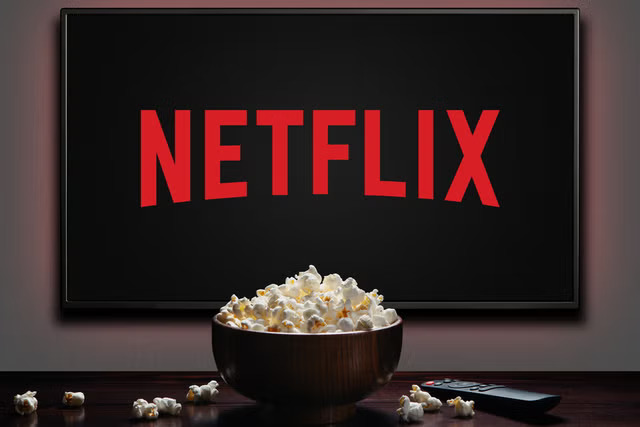

# 1. Intro

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### *Interesting Task Ideas:*

1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Does Netflix has more focus on TV Shows than movies in recent years.

# Imports and pre-project setup

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"idanlevy27","key":"7a53c4c4775bca7acc75c74d158c723b"}'}

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
import pandas as pd
import numpy as np
#visualization libraries
import plotly as plt
import seaborn as sns

# import library to extract the file download from kaggle
import zipfile

# use to download the dataset programatically from kaggle
import kaggle

In [6]:
# Download dataset from kaggle using the Kaggle API
!kaggle datasets download -d shivamb/netflix-shows

 75% 1.00M/1.34M [00:00<00:00, 1.45MB/s]
100% 1.34M/1.34M [00:00<00:00, 1.81MB/s]


In [7]:
# extract the file from the downloaded zip file
zipfile_name = 'netflix-shows.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
  file.extractall()

In [8]:
netflix = pd.read_csv("netflix_titles.csv")

# Know the Data

In [9]:
# explore the data
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
# shape of the dataframe
rows, columns = netflix.shape
print(f"In the Netflix data there are {rows} rows and {columns} columns")

In the Netflix data there are 8807 rows and 12 columns


features explanation

*   show id = Unique ID for every Movie / Tv Show
*   type = Identifier - A Movie or TV Show
*   title = Title of the Movie / Tv Show
*   director = Director of the Movie
*   cast = Actors involved in the movie / show
*   country = Country where the movie / show was produced
*   date_added = Date it was added on Netflix
*   release_year = Actual Release year of the move / show
*   rating = TV Rating of the movie / show
*   duration = Total Duration - in minutes or number of seasons
*   listed_in = Genere
*   description = The summary description

                









# Data Correctness

In [11]:
# How many values for each feature
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [12]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
# check for duplicates
netflix.duplicated().sum()

0

In [14]:
# check for missing values
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
titles_without_durations = list(netflix.loc[netflix['duration'].isnull()]["title"])
titles_without_durations

['Louis C.K. 2017',
 'Louis C.K.: Hilarious',
 'Louis C.K.: Live at the Comedy Store']

In [16]:
unique_ratings = netflix.rating.unique()
unique_ratings

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

When I tried to fill the missing values I have noticed that there was an error in the data entry and instead of entry to the 'duration' column it was entried in the 'rating'.

In [17]:
# Simultaneously extract strings containing "min" and replace them with NaN in the rating

durations_to_fill = []
for i in range(len(unique_ratings)):
    if isinstance(unique_ratings[i], str) and 'min' in unique_ratings[i]:
        durations_to_fill.append(unique_ratings[i])
        netflix.loc[netflix['rating'] == unique_ratings[i], 'rating'] = np.nan

In [18]:
# Iterate over titles and durations to fill simultaneously
for title, duration in zip(titles_without_durations, durations_to_fill):
    # Find rows where the title matches and duration is missing, then fill with the corresponding duration
    netflix.loc[(netflix['title'] == title) & (netflix['duration'].isna()), 'duration'] = duration


That was an example of how I explore the data, collect missing data and manipulate it in efficient way.

In [19]:
# check to see if the changes updated
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [20]:
# save the changes to excel file
netflix.to_excel('netflix_data_for_dashboard.xlsx', sheet_name='Data')